<a href="https://colab.research.google.com/github/zuhaib786/Disconinuity-Identification-in-Numerical-solutions-of-DEs/blob/main/2D_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSTRUCTION OF A UNIVERSAL DISCONTINUITY DETECTOR USING CONVOLUTION NEURAL NETWORKS
This notebook is for generation of 2D-discontinuity data given in the paper mentioned in the title<br>
The generated data will be used for training a Convolutional Neural Network(CNN)<br>


In [ ]:
# Legendre Polynomials

In [ ]:
class Legendre:
  def __init__(self):
    self.coeff = [[1], [0, 1], [-0.5, 0, 1.5], [0, -1.5, 0, 2.5], [0.375, 0, -3.75,0 , 4.375]]
  def calc(self, x, deg):
    data = self.coeff[deg]
    ans = 0
    mul = 1
    for i in data:
      ans += i * mul
      mul = mul * x
    return ans

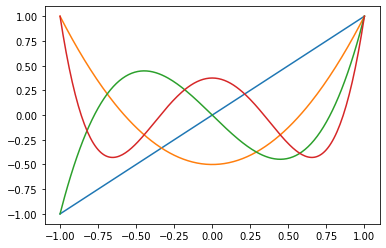

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
for deg in range(1,5):
  L = Legendre()
  x = np.linspace(-1, 1, 201)
  x = list(x)
  y = []
  for i in x:
    y.append(L.calc(i, deg))
  plt.plot(x, y)
plt.show()

In [ ]:
class DataGenerator:
  def __init__(self, N_P = 4):
    self.N_P = 4
    self.L = Legendre()
    self.coeff_mat1  = self.genMat()
    self.coeff_mat2 = self.genMat()
    self.order = np.linspace(-1, 1, 101)
    self.mesh_x = np.linspace(-1, 1, 101)
    self.mesh_y = np.linspace(-1, 1, 101)
    self.mesh_x , self.mesh_y = np.meshgrid(self.mesh_x, self.mesh_y)
  def calc(self, mat):
    ans = np.zeros((101, 101))
    data = []
    if mat == 1:
      data = self.coeff_mat1
    else:
      data = self.coeff_mat2 

    for i in range(self.N_P + 1):
      for j in range(self.N_P  +1 - i):
        A = self.L.calc(self.mesh_x, i)
        B = self.L.calc(self.mesh_y, j)
        ans += data[i][j] *(A*B)
    return ans
  def lineCut(self):
    theta = np.random.uniform(0, 2*math.pi)
    x_0, y_0 = np.random.choice(self.order , 1), np.random.choice(self.order, 1)
    x_0 = list(x_0)[0]
    y_0 = list(y_0)[0]
    return self.lineToBinaryMat(x_0, y_0, theta) 
  def LineCalc(self, x_0, y_0, theta, x, y):
    return np.cos(theta) * (x - x_0) + np.sin(theta) * (y - y_0)
  def circCut(self):
    r = np.random.uniform(1e-2, 3)
    x_0, y_0 = np.random.choice(self.order , 1), np.random.choice(self.order, 1)
    x_0 = list(x_0)[0]
    y_0 = list(y_0)[0]
    x_0, y_0 = 0,0
    return self.cricToBinaryMat(x_0, y_0, r)
  def lineToBinaryMat(self, x_0, y_0, theta):
    A = self.LineCalc(x_0, y_0, theta, self.mesh_x, self.mesh_y)
    eps = 2e-2
    # print(A)
    # print(np.sum(abs(A)<=eps))
    return A >= 0,np.abs(A) <= eps 
  def CircCalc(self, x_0, y_0, r):
    return (self.mesh_x - x_0) * (self.mesh_x - x_0) + (self.mesh_y - y_0) * (self.mesh_y - y_0) - r
  def cricToBinaryMat(self, x_0, y_0, r):
    A = self.CircCalc(x_0, y_0, r)
    eps = 2e-2
    return A>=0 , np.abs(A) <= eps
  def genMat(self):
    data = np.random.normal(0, 1, size=(101, 101))
    return data
  def DataPointLine(self):
    self.mat1 = self.genMat()
    self.mat2 = self.genMat()
    ans1  = self.calc(1)
    ans2 = self.calc(2)
    y, label = self.lineCut()
    ans = ans1 * y + ans2 *( 1- y)
    return ans, label
  def DataPointCirc(self):
    self.mat1 = self.genMat()
    self.mat2 = self.genMat()
    ans1 = self.calc(1)
    ans2 = self.calc(2)
    y, label = self.circCut()
    ans = ans1 * y + ans2 * ( 1- y)
    return ans, label




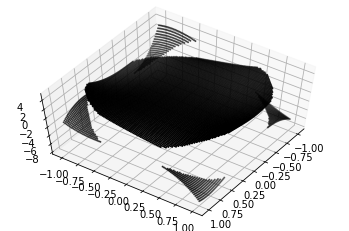

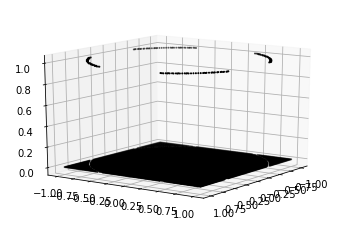

In [ ]:
d = DataGenerator()
ans, y = d.DataPointCirc()


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, ans,color = 'black', s =1)
ax.view_init(60, 35)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, y,color = 'black', s = 1)
ax.view_init(15, 35)


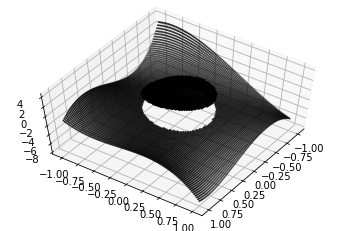

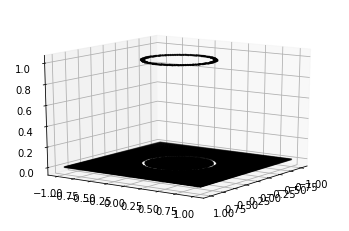

In [ ]:
ans, y = d.DataPointCirc()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, ans,color = 'black', s =1)
ax.view_init(60, 35)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, y,color = 'black', s = 1)
ax.view_init(15, 35)

In [ ]:
import pandas as pd
Di = {}
for i in range(101 * 101):
  Di[i] = []



# Realization
Realized that i cannot save the data as the data will get very large impacting performance
# Solution
Generate Data online and use stochastic gradient descent


In [ ]:
def getData():
  import random
  ydf = pd.DataFrame.from_dict(Di)
  xdf = pd.DataFrame.from_dict(Di)
  j = 0
  for j in range(500) :
    a = random.randint(1, 10)%2
    ans, y = 0, 0
    if a %2 == 0:
      ans, y = d.DataPointCirc()
    else:
      ans, y = d.DataPointLine()
    xdf.loc[j] = ans.reshape(101 * 101)
    ydf.loc[j] = y.reshape(101 * 101)
  return xdf, ydf

  

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
import keras as K
from keras import layers as L
def create_model(input_size = (101, 101, 1)):
  inp = L.Input(shape = input_size[0] * input_size[1])
  X = L.Reshape(input_size)(inp)
  X = L.Conv2D(
      kernel_size = (2, 2), 
      strides = (1, 1),
      filters = 32,
      activation = 'relu',

  )(X)
  X = L.MaxPooling2D(
      pool_size = (2, 2),
      strides = (2, 2),

  )(X)
  X = L.Conv2D(
      kernel_size = (2, 2),
      strides = (1,1),
      filters = 32,
      activation = 'relu'
  )(X)
  X = L.Conv2D(
      kernel_size = (2,2),
      strides = (1,1),
      filters = 32,
      activation = 'relu'
  )(X)
  X = L.Conv2D(
      kernel_size = (2,2),
      strides = (1,1),
      filters = 32,
      activation = 'relu'
  )(X)
  X = L.Flatten()(X)
  X = L.Dense(input_size[0] * input_size[1], 
              activation = 'sigmoid',
              )(X)
  model = K.Model(inputs = inp, outputs = X)
  return model

In [ ]:
model = K.models.load_model('/content/content')
# model = create_model()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10201)]           0         
                                                                 
 reshape (Reshape)           (None, 101, 101, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4128      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        4128      
                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])


In [ ]:
import gc
gc.collect()

161

In [ ]:
for i in range(1):
  xdf, ydf = getData()
  model.fit(
      x = xdf,
      y = ydf,
      batch_size = 10,
      epochs = 1,
  )
  print("==============Iteration Number " + str(i + 1) + " ==============" )
  

50/50 [==============================] - 9s 171ms/step - loss: 0.0139 - binary_accuracy: 0.9945 - false_negatives: 16622.0000
==============Iteration Number 1 ==============


In [ ]:
xdf, ydf = getData()
pred = model.predict(xdf)

In [ ]:
pred[0]

array([0.00294752, 0.00117294, 0.00146414, ..., 0.00016995, 0.00039801,
       0.0002762 ], dtype=float32)

In [ ]:
len(pred[0])

10201

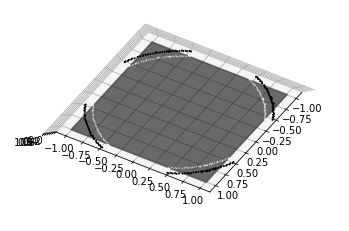

In [ ]:
M = 19
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, pred[M].reshape(101, 101)>=0.2,color = 'black', s =1)
# ax.scatter3D(d.mesh_x, d.mesh_y, xdf.iloc[0].values.reshape(101, 101),color = 'black', s =1)
ax.view_init(90, 35)

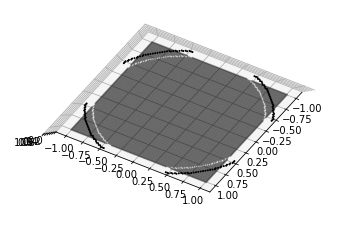

In [ ]:
# M = 12
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.scatter3D(d.mesh_x, d.mesh_y, ydf.iloc[0].values.reshape(101, 101),color = 'black', s =1)
ax.scatter3D(d.mesh_x, d.mesh_y, ydf.iloc[M].values.reshape(101, 101),color = 'black', s =1)
ax.view_init(90, 35)

In [ ]:
Di = {}

In [ ]:
model.save('./content')

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
!cp /content/New-Model-No-Dense -r /content/gdrive/MyDrive

In [ ]:
gc.collect()

34105

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
import keras as K
from keras import layers as L
def newModel(input_size = (101, 101, 1)):
  inp = L.Input(shape = input_size[0] * input_size[1])
  X = L.Reshape(input_size)(inp)
  X = L.Conv2D(
      kernel_size = (2, 2), 
      strides = (1, 1),
      filters = 32,
      activation = 'relu',
      padding = 'same'

  )(X)
  X = L.Conv2D(
      kernel_size = (2, 2),
      strides = (1,1),
      filters = 32,
      activation = 'relu',
      padding = 'same'
  )(X)
  X = L.Conv2D(
      kernel_size = (2,2),
      strides = (1,1),
      filters = 32,
      activation = 'relu',
      padding = 'same'
  )(X)
  X = L.Conv2D(
      kernel_size = (2,2),
      strides = (1,1),
      filters = 64,
      activation = 'relu', 
      padding = 'same'
  )(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 64,
    activation = 'relu', 
    padding = 'same'
)(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 128,
    activation = 'relu', 
    padding = 'same'
)(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 128,
    activation = 'relu', 
    padding = 'same'
)(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 128,
    activation = 'relu', 
    padding = 'same'
)(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 64,
    activation = 'relu', 
    padding = 'same'
)(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 32,
    activation = 'relu', 
    padding = 'same'
)(X)
  X = L.Conv2D(
    kernel_size = (2,2),
    strides = (1,1),
    filters = 32,
    activation = 'relu', 
    padding = 'same'
)(X)

  X = L.Conv2D(
      kernel_size = (2,2),
      strides = (1,1),
      filters = 1,
      activation = 'sigmoid', 
      padding = 'same'
  )(X)
  
  X = L.Flatten()(X)
  model = K.Model(inputs = inp, outputs = X)
  return model

In [ ]:
model = newModel()

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10201)]           0         
                                                                 
 reshape_7 (Reshape)         (None, 101, 101, 1)       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 101, 101, 32)      160       
                                                                 
 conv2d_64 (Conv2D)          (None, 101, 101, 32)      4128      
                                                                 
 conv2d_65 (Conv2D)          (None, 101, 101, 32)      4128      
                                                                 
 conv2d_66 (Conv2D)          (None, 101, 101, 64)      8256      
                                                                 
 conv2d_67 (Conv2D)          (None, 101, 101, 64)      1644

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [ ]:
loss = []
for i in range(100):
  xdf, ydf = getData()
  hist = model.fit(
      x = xdf,
      y = ydf,
      batch_size = 10,
      epochs = 1,
  )
  loss.append(hist.history['loss'])
  print("==============Iteration Number " + str(i + 1) + " ==============" )
  

50/50 [==============================] - 6s 100ms/step - loss: 0.2013 - binary_accuracy: 0.9253 - false_negatives_4: 73238.0000
==============Iteration Number 1 ==============
50/50 [==============================] - 5s 101ms/step - loss: 0.0821 - binary_accuracy: 0.9845 - false_negatives_4: 79229.0000
==============Iteration Number 2 ==============
50/50 [==============================] - 5s 101ms/step - loss: 0.0835 - binary_accuracy: 0.9839 - false_negatives_4: 82048.0000
==============Iteration Number 3 ==============
50/50 [==============================] - 5s 100ms/step - loss: 0.0811 - binary_accuracy: 0.9844 - false_negatives_4: 79731.0000
==============Iteration Number 4 ==============
50/50 [==============================] - 5s 99ms/step - loss: 0.0814 - binary_accuracy: 0.9843 - false_negatives_4: 80260.0000
==============Iteration Number 5 ==============
50/50 [==============================] - 5s 99ms/step - loss: 0.0810 - binary_accuracy: 0.9843 - false_negatives_4: 79883

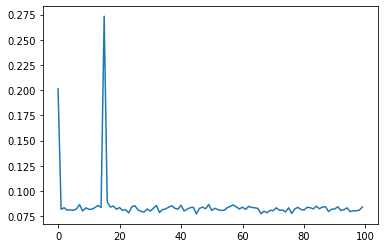

In [ ]:
y = list(range(100))
plt.plot(y, loss)

In [ ]:
xdf, ydf = getData()
pred = model.predict(xdf)

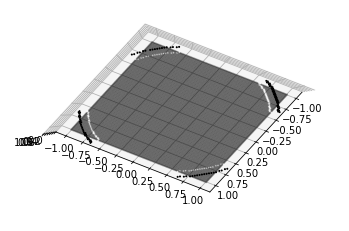

In [ ]:
M = 100
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, pred[M].reshape(101, 101)>=0.1,color = 'black', s =1)
# ax.scatter3D(d.mesh_x, d.mesh_y, xdf.iloc[0].values.reshape(101, 101),color = 'black', s =1)
ax.view_init(90, 35)

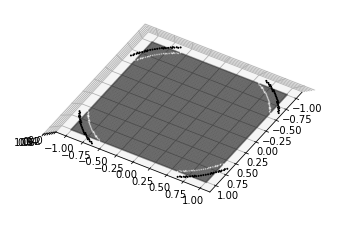

In [ ]:
# M = 12
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.scatter3D(d.mesh_x, d.mesh_y, ydf.iloc[0].values.reshape(101, 101),color = 'black', s =1)
ax.scatter3D(d.mesh_x, d.mesh_y, ydf.iloc[M].values.reshape(101, 101),color = 'black', s =1)
ax.view_init(90, 35)

In [ ]:
model.save('New-Model-No-Dense')